In [1]:
# IMPORTS
import re, numpy as np, random
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [2]:
films=[]
for p in Path("C:/Users/forem/Code/text-as-data/people/Foreman/Adventure").glob('*.txt'):
    with open(p, mode="r", encoding="utf-8") as f:
        film = f.read()
        films.append(film)


print(len(films))

166


In [3]:
sample = random.choice(films)
# print(sample)
print(sia.polarity_scores(sample))

{'neg': 0.09, 'neu': 0.77, 'pos': 0.14, 'compound': 1.0}


In [4]:
positive_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0]
print("Positive Words:", positive_words)

Positive Words: ['FAIR', 'WORTH', 'CLEAR.', 'LOVE', 'BEAUTY', 'share', 'BEAUTIFUL!', 'POWERFUL!', 'STRONGER', 'STRONGER', 'STRONGER', 'FAIR', 'WORTH', 'CLEAR.', 'LOVE', 'BEAUTY', 'play.', 'play', 'want', 'smiles.', 'hand.', 'excited.', 'laughs', 'amazing!', 'laughing.', 'PLAY', 'like', 'warm', 'hugs.', 'hugs', 'love', 'fearlessly', 'hand!', 'Please,', 'help.', 'luckily,', 'bright', 'hand', 'hugs', 'Cuties.', 'GRAND', 'determined.', 'respectfully', 'GRAND', 'stronger.', 'Grand', 'GRAND', 'lucky', 'easily', 'GRAND', 'recommend', 'fun.', 'Grand', 'energy', 'Grand', 'play', 'GRAND', 'okay.', 'best.', 'creating', 'beauty', 'great', 'protect', 'sure.', 'gentle', 'Want', 'WANT', 'PLAY.', 'LIKE', 'plays', 'BEST', 'WISH', 'WANT', 'longingly.', 'freeze', 'help.', 'hand.', 'WANT', 'gaining', 'courageous', 'like', 'playing', 'stronger.', 'hug', 'want', 'fine,', 'PLEASE', 'COURAGE', 'PLEASE', 'WANT', 'Welcome', 'excitedly', 'like', 'want,', 'Please!', 'Share!', 'care', 'riches.', 'Dignitary.', 'lov

Some movies such as Jurassic Park have their positive word count flooded with the main protagonist name if they are seen
as heroic or helpful.

In [5]:
positive_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0])
print("Number of Positive Words:", positive_word_count)
# This is just for comparison between the total number of positive words when the cells before are rerun to pull a
# different text file

Number of Positive Words: 844


In [6]:
negative_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0]
print("Negative Words:", negative_words)

Negative Words: ['cuts', 'drag', 'blocks', 'CUT', 'STRIKE', 'STRIKE', 'FEAR.', 'struggles', 'block', 'fails,', 'DANGEROUS!', 'threateningly.', 'fight', 'drag', 'CUT', 'block', 'STRIKE', 'STRIKE', 'FEAR.', 'DANGER', 'block', 'defeated.', 'accidentally', 'STRIKES', 'struck,', 'frightening', 'accident.', 'sorry,', 'SLAM', 'CUT', 'alone', 'SLAM', 'CUT', 'hide', 'frightened', 'crushed!', 'stop', 'worry,', 'leave', 'danger.', 'panic', 'attack', 'Fear', 'enemy.', 'No.', 'disappears.', 'confused', 'sad.', 'sad.', 'Alone,', 'EMPTY', 'no', 'LONELY', 'EMPTY', 'bored', 'panics.', 'scared.', 'upset', 'worse.', 'No.', 'hurt', 'alarmed', 'sadness.', 'stopping.', 'leave', 'rages', 'lost', 'mourning', 'mourning', 'suspended', 'grief.', 'fault.', 'exploit', 'leave', 'sore', 'CUT', 'Sorry', 'No,', 'SLAM', 'CUT', 'EMPTY', 'NO', 'Hides', 'STRANGE.', 'ALONE.', 'ridiculous.', 'BIZARRE.', 'CRAZY', 'WRONG', 'cut', 'nerves.', 'AGONY', 'AGONY', 'LEAVE', 'sorry.', 'hurt?', 'no.', 'No.', 'Awkward.', 'awkward.', 'a

In [7]:
negative_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0])
print("Number of Negative Words:", negative_word_count)
# This is just for comparison between the total number of negative words when the cells before are rerun to pull a different
# text file

Number of Negative Words: 659


All code above just pulls a random single text file from the films list and displays the list of positive and negative numbers along with the counts for each.

In [8]:
text = films[2]
print(text[0:100])

				    2001: A SPACE ODYSSEY

					    Screenplay

						   by

			   Stanley Kubrick and Arthur C.


In [9]:
print(sia.polarity_scores(text))

{'neg': 0.086, 'neu': 0.797, 'pos': 0.117, 'compound': 1.0}


The two code blocks above create a new item named text based on the films list that allows you to pull
a specified file from the films list. With this new item the next code block runs and returns a polarity score.

In [10]:
sentences = sent_tokenize(text)
# print(sentences[0:10])

scores = []
for sentence in sentences:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)

# print(scores[10:100])

# Program to calculate moving average
window_size = 100

i = 0
# Initialize an empty list to store moving averages
moving_averages = []

# Loop through the array to consider
# every window of size 3
while i < len(scores) - window_size + 1:

	# Store elements from i to i+window_size
	# in list to get the current window
	window = scores[i : i + window_size]

	# Calculate the average of current window
	window_average = round(sum(window) / window_size, 2)
	
	# Store the average of current
	# window in moving average list
	moving_averages.append(window_average)
	
	# Shift window to right by one position
	i += 1

print(len(moving_averages))
print(len(scores))

1188
1287


The code block above is all the necessary steps to create a sentiment analysis based on the sentences and return the compund scores.
Then it creates an adjustable moving average to go and return an average based on the window size

In [11]:
values = enumerate(moving_averages)
x, y = zip(*values)

The second line of code in the block above takes the value pairs in values and unpacks them into
separate list

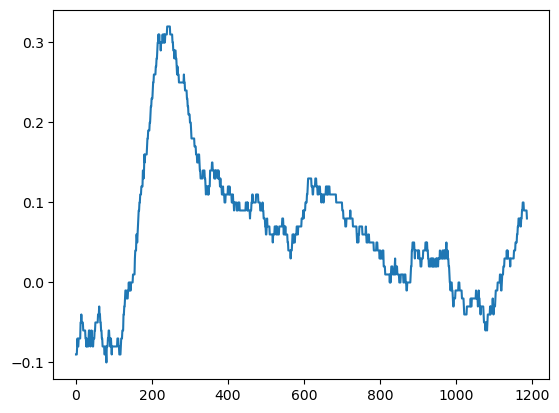

In [12]:
plt.plot(x, y)
plt.show()

In [13]:
titles= []

for p in Path('C:/Users/forem/Code/text-as-data/people/Foreman/Adventure').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        title = p.name[:-4]
        titles.append(title)

In [15]:
for i, film in enumerate(films):
    file_name = titles[i]
    scores1 = sia.polarity_scores(film)["compound"]
    print(f"{file_name}: Score: {scores1}")

127hours: Score: -1.0
1492conquestofparadise: Score: 0.9997
2001aspaceodyssey: Score: 1.0
2012: Score: -0.6817
30minutesorless: Score: -1.0
9: Score: -1.0
abyssthe: Score: -1.0
adventuresofbuckaroobanzaiacrosstheeighthdimensionthe: Score: 0.9998
airforceone: Score: -1.0
antz: Score: 0.9995
armyofdarkness: Score: -1.0
avatar: Score: 0.9999
avengersthe: Score: 0.9999
avengersthe2012: Score: -1.0
beachthe: Score: 0.9995
bigfish: Score: 1.0
bookofelithe: Score: -0.9997
bourneidentitythe: Score: -0.9999
bourneultimatumthe: Score: -1.0
brokenarrow: Score: -1.0
brothersbloomthe: Score: 0.9997
cars2: Score: 1.0
castaway: Score: 0.9931
chroniclesofnarniathelionthewitchandthewardrobe: Score: -0.9988
cirquedufreakthevampiresassistant: Score: -1.0
clashofthetitans: Score: -0.9998
cliffhanger: Score: -1.0
conanthebarbarian: Score: -1.0
coraline: Score: 0.9999
croodsthe: Score: -0.9054
crouchingtigerhiddendragon: Score: -0.9992
danceswithwolves: Score: 0.9999
despicableme2: Score: 0.9999
detroitrock